In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Placement_Data Class Data set.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


1.sl_no : Serial Number,

2.ssc_p : Secondary Education percentage- 10th Grade

3.ssc_b : Board of Education- Central/ Others

4.hsc_p : Higher Secondary Education percentage- 12th Grade

5.hsc_b : Board of Education- Central/ Others

6.hsc_s : Specialization in Higher Secondary Education

7.degree_p : Degree Percentage

8.degree_t : Under Graduation(Degree type)- Field of degree education

9.workex : Work Experience

10.etest_p : Employability test percentage ( conducted by college)

11.specialisation : Post Graduation(MBA)- Specialization

12.mba_p : MBA percentage

13.status : Status of placement- Placed/Not placed

14.salary : Salary if the student is placed

**Get all feature names**

In [3]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

**Find the number of records and columns**

In [4]:
df.shape

(215, 15)

**for just column**

In [5]:
df.shape[1]

15

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**What is the average Secondary Education percentage - 10th Grade**

**How many toppers where there in 10th Grade?**

In [7]:
df['ssc_p'].mean()

67.30339534883721

In [8]:
df['ssc_p'].max()

89.4

In [9]:
df[df['ssc_p'] == df['ssc_p'].max()]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
145,146,M,89.4,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.0,Mkt&HR,63.23,Placed,400000.0


In [10]:
df[df['ssc_p'] == df['ssc_p'].max()].shape[0]

1

In [11]:
df[df['ssc_p'] == df['ssc_p'].max()]['status']

145    Placed
Name: status, dtype: object

In [12]:
df[df['hsc_p'] == df['hsc_p'].max()]['status']

24    Placed
Name: status, dtype: object

**How many students are placed or unplaced?**

In [13]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

**What is the most common degree of the placed students?**

In [14]:
df[df['status'] =='Placed']['degree_t'].value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64

**How many unique degrees are there in the dataset?**

In [15]:
df['degree_t'].nunique()

3

**Is there a correlation between 10th and 12th percentage**

In [16]:
df[['ssc_p','hsc_p']].corr()

,ssc_p,hsc_p
ssc_p,1.000000,0.511472
hsc_p,0.511472,1.000000


**Find the correlation matrix**

In [17]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


# Data Pre-processing

**Identify the column which can be removed? (only 1)**

**Remove the unnecessary column**

In [18]:
df.drop(columns=['sl_no'], inplace=True)

In [19]:
df.head(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


**Check number of null values in each column**

In [20]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**Fill the missing values with appropriate values and check number of null values in each column again**

In [21]:
df = df.fillna(0)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Data Visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

**Draw a scatter plot between 10th and 12th percentage with labels and title**

Text(0, 0.5, '12th Percent')

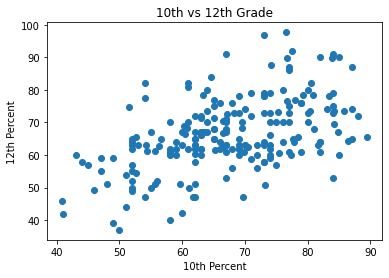

In [23]:
plt.scatter(df["ssc_p"],df["hsc_p"])
plt.title("10th vs 12th Grade")
plt.xlabel("10th Percent")
plt.ylabel("12th Percent")

**Draw the scatter plot between 10th and 12th class percentage of students grouped based on placement data**

<AxesSubplot:xlabel='ssc_p', ylabel='hsc_p'>

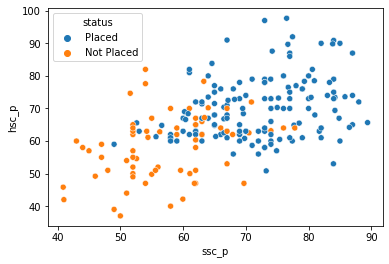

In [24]:
sns.scatterplot(x=df['ssc_p'] , y=df['hsc_p'] , hue = df['status'])

Text(0, 0.5, '12th Percent')

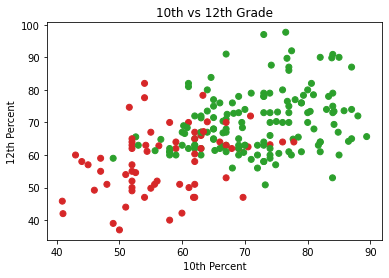

In [25]:
colors={'Placed':'tab:green','Not Placed':'tab:red'}
plt.scatter(df['ssc_p'],df['hsc_p'],c=df['status'].map(colors))
plt.title("10th vs 12th Grade")
plt.xlabel("10th Percent")
plt.ylabel("12th Percent")

**Draw the pairplots between all continuous columns**



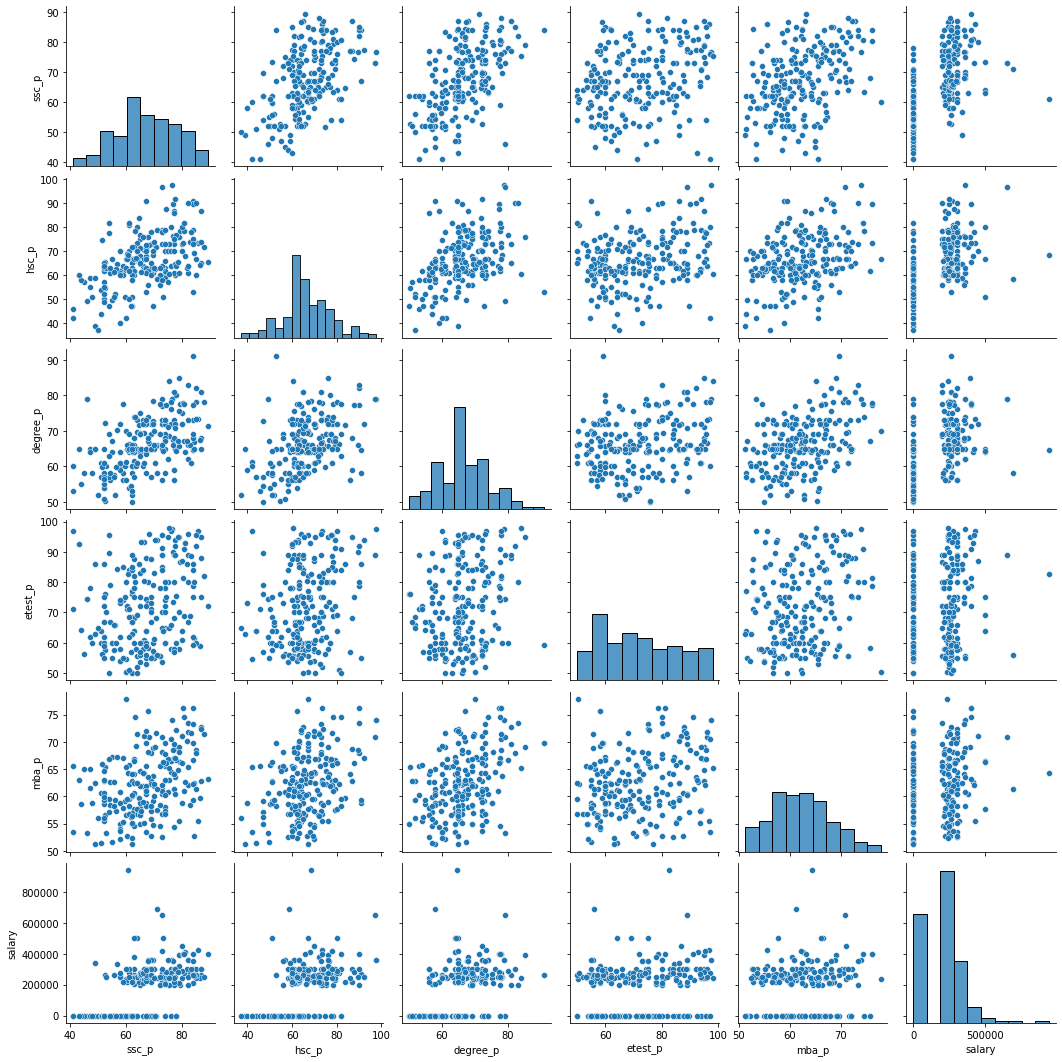

In [26]:
sns.pairplot(df)

Wall time: 4.04 s


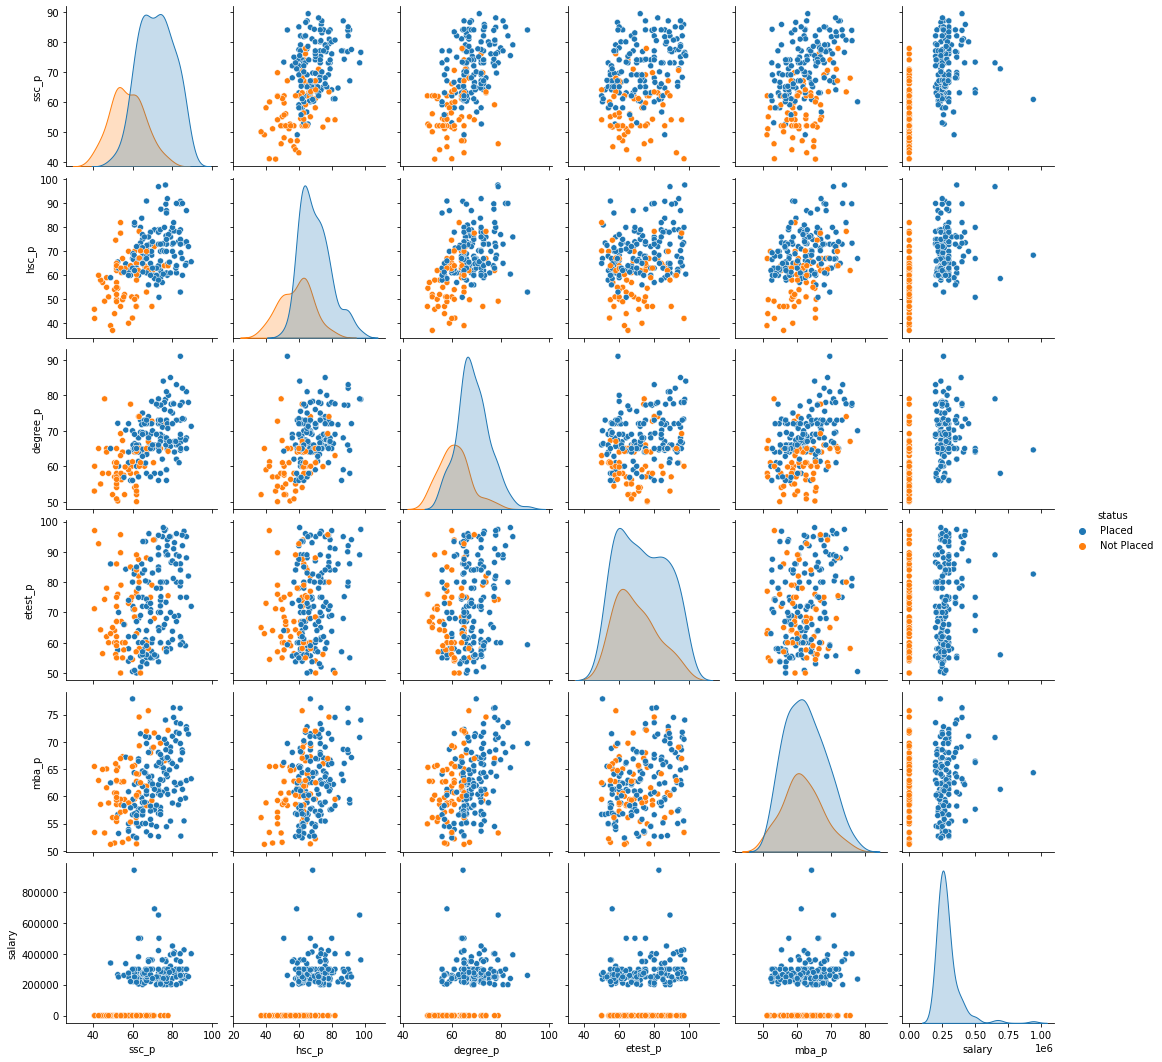

In [27]:
%%time
sns.pairplot(df,hue='status')

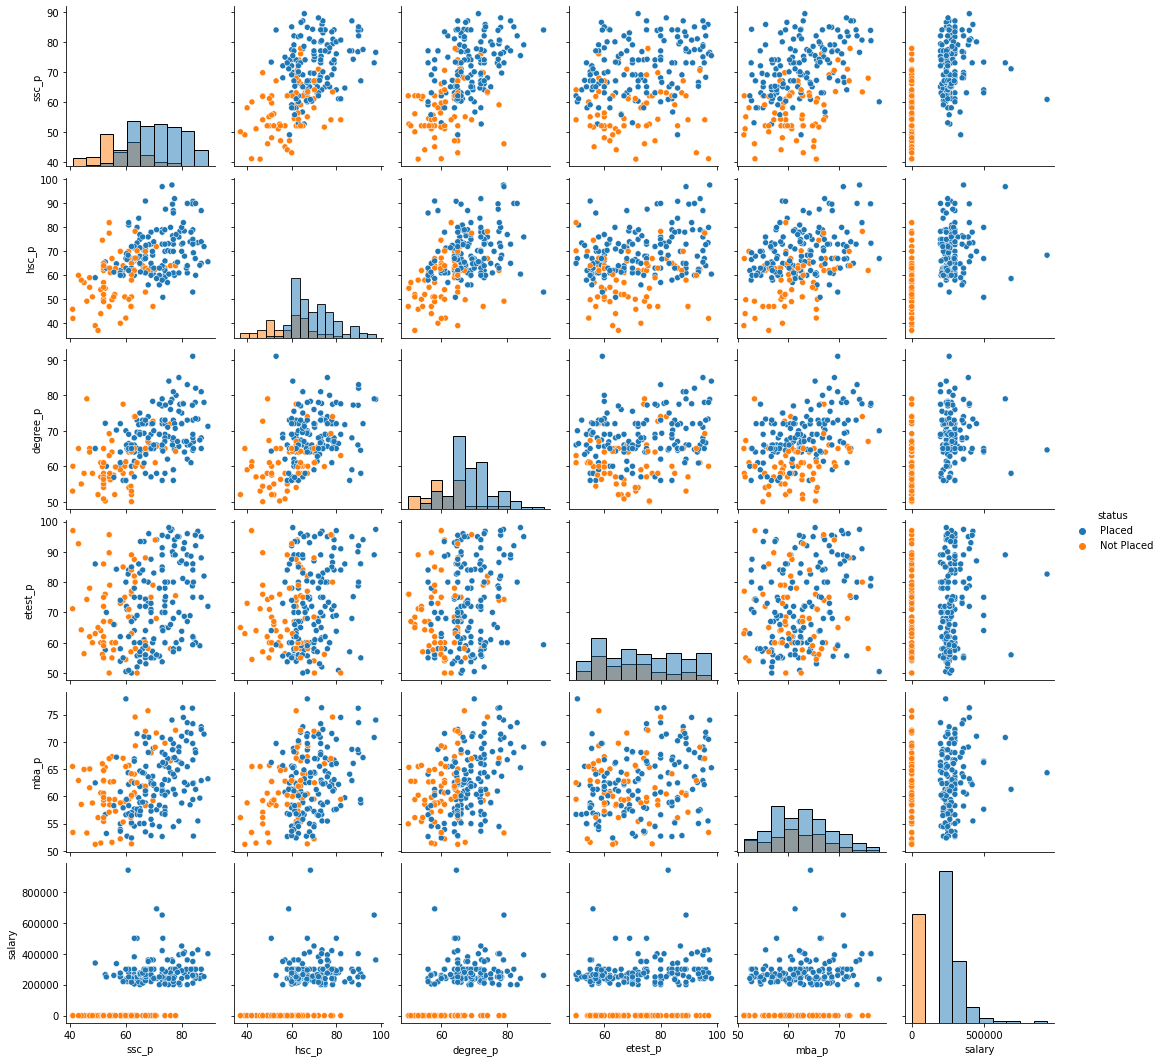

In [28]:
sns.pairplot(df,hue='status',diag_kind='hist')

**Draw a boxplot for 10th percentile of the students**

<AxesSubplot:ylabel='hsc_p'>

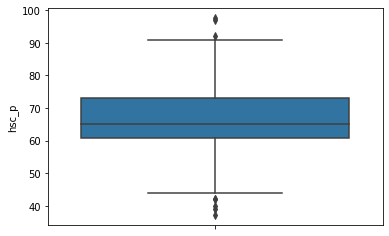

In [29]:
sns.boxplot(y='hsc_p' ,data = df)

**Draw a boxplot for 12th percentile of the students**

<AxesSubplot:ylabel='hsc_p'>

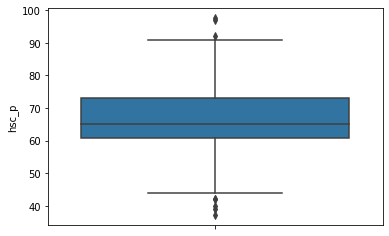

In [30]:
sns.boxplot(y='hsc_p', data = df)

**Draw a boxplot for 12th percentage of the students for placed and unplaced students**

<AxesSubplot:xlabel='status', ylabel='hsc_p'>

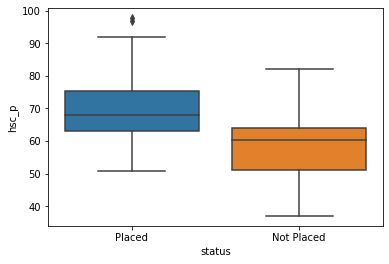

In [31]:
sns.boxplot(y='hsc_p',data=df, x='status')

**Draw lineplot for 10th, 12th, degree and MBA percentage**

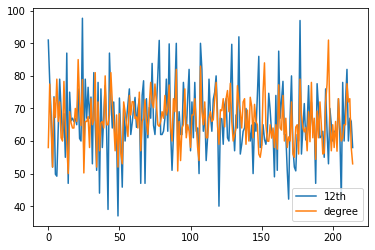

In [32]:
plt.plot(df['hsc_p'], label="12th")
plt.plot(df['degree_p'], label="degree")
plt.legend()

**Find correlation between continous columns**

In [33]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


**Draw heatmap of correlation**

heatmap visualization or heatmap data visualization is a method of graphically representing numerical data where the value of each data point is indicated using colors.

<AxesSubplot:>

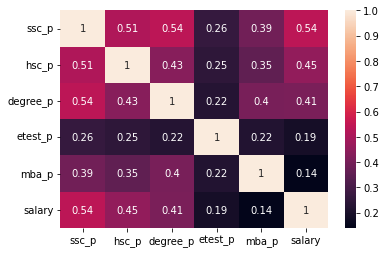

In [34]:
sns.heatmap(df.corr(), annot=True)

**Draw histogram for salary of students**

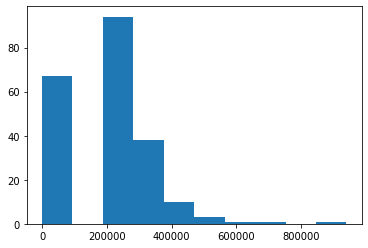

In [35]:
plt.hist(df['salary'])
plt.show()

**Draw the distribution of 10th Grade percentage**

<AxesSubplot:xlabel='ssc_p', ylabel='Density'>

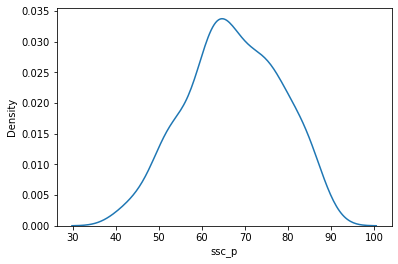

In [36]:
sns.kdeplot(df['ssc_p'])

# Outlier Analysis

In [37]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


<AxesSubplot:ylabel='degree_p'>

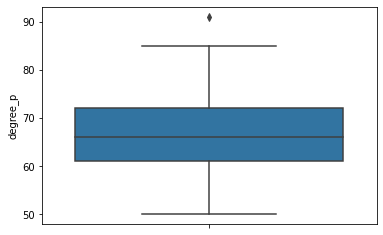

In [38]:
sns.boxplot(y='degree_p',data = df)

In [39]:
percentile25 = df['degree_p'].quantile(0.25)
percentile25

61.0

In [40]:
percentile75 = df['degree_p'].quantile(0.75)
percentile75

72.0

In [41]:
iqr = percentile75 - percentile25
iqr

11.0

In [42]:
upper_limit = percentile75 + (1.5 * iqr)
upper_limit

88.5

In [43]:
lower_limit = percentile25 - (1.5 * iqr)
lower_limit

44.5

In [44]:
df = df[(df['degree_p'] < upper_limit) & (df['degree_p'] > lower_limit)]

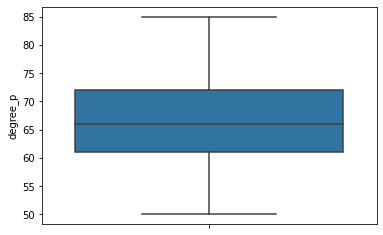

In [45]:
sns.boxplot(y='degree_p',data = df)
plt.show()

In [46]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

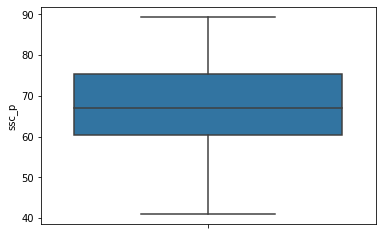

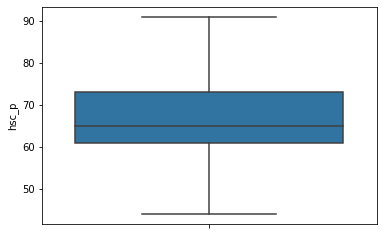

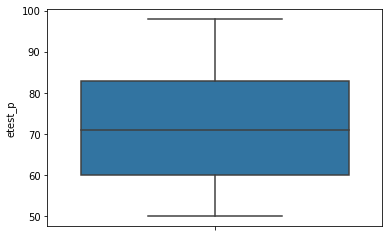

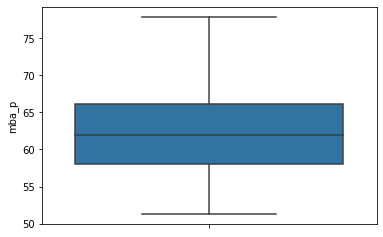

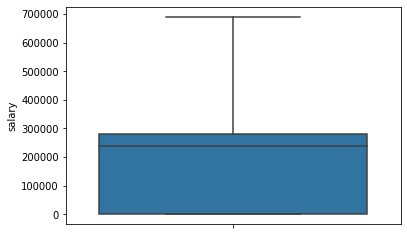

In [47]:
col=['ssc_p','hsc_p','etest_p','mba_p','salary']
for c in col:
    percentile25 = df[c].quantile(0.25)
    percentile75 = df[c].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    df = df[(df[c] < upper_limit) & (df[c] > lower_limit)]
    plt.figure()
    sns.boxplot(y=c,data=df)

# Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder 

In [49]:
le = LabelEncoder()

In [50]:
df['ssc_b']

1      Central
2      Central
3      Central
4      Central
5       Others
        ...   
210     Others
211     Others
212     Others
213     Others
214    Central
Name: ssc_b, Length: 204, dtype: object

In [51]:
le.fit_transform(df['ssc_b'])

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0])

In [52]:
df['ssc_b'] = le.fit_transform(df['ssc_b'])

In [53]:
col = ['gender','hsc_b','hsc_s','degree_t','workex','specialisation','status']

In [54]:
for c in col:
   df[c] = le.fit_transform(df[c]) 

In [55]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


**Extract the independent and Dependent variable**

In [56]:
X = df.iloc[:,0:-1].values
Y = df.iloc[:,-1].values

**Split the dataset into test and train**

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,train_size = 0.75, random_state = 4)

**Use Standardization and perform Linear Regression**

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Perform Linear Regression**

In [60]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [61]:
reg.intercept_

205071.89542483658

In [62]:
reg.coef_

array([ 11825.32807183,  -2651.51305223,   7403.99998439,  -3335.24488554,
        -3778.88006509,   2630.17168817,  -8711.91367546,  15400.07127691,
        -2921.64872131,   1679.73380701,  -8939.36623778,  14087.03480453,
       132231.83456565])

In [63]:
Y_pred=reg.predict(X_test)

In [64]:
pd.DataFrame({'Actual': Y_test , 'Predicted' : Y_pred})

,Actual,Predicted
0,250000.0,281577.926515
1,0.0,9707.759738
2,0.0,-5006.433058
3,0.0,12300.603332
4,0.0,-46533.674722
5,300000.0,260208.723833
6,250000.0,274821.656105
7,300000.0,283365.137631
8,265000.0,262530.109333
9,200000.0,263466.689158


**Evaluate the model using MSE, RMSE and R square**

In [65]:
from sklearn import metrics

In [66]:
MSE=metrics.mean_squared_error(Y_test, Y_pred)
MSE

2362926643.0088906

In [67]:
RMSE=np.sqrt(MSE)
RMSE

48609.9438696332

In [68]:
R2=metrics.r2_score(Y_test,Y_pred)
R2

0.862073316320366

In [69]:
adj_r2 =  1 - ( (1-R2) * (205-1) / (205-13-1) ) 
adj_r2

0.8526856362793438

# Logistic Regression

In [70]:
df.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0


**Extract the independent and dependent(status) variables**

In [71]:
X = df.drop(['status','salary'],axis=1).values
X

array([[ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 56.  ,  0.  , ..., 66.  ,  1.  , 59.43],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [72]:
Y = df['status'].values
Y

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0])

**Split the dataset into training and testing dataset**

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, random_state = 42)

**Use Standardization**

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Build the Logistic Regression Model**

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [76]:
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
pd.DataFrame({'Actual': Y_test , 'Predicted' : Y_pred})

,Actual,Predicted
0,1,1
1,1,0
2,1,0
3,0,1
4,1,1
5,1,1
6,1,1
7,0,0
8,1,1
9,0,1


**Create the confusion matrix and draw a heatmap for it**

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[ 8,  2],
       [ 6, 25]], dtype=int64)

In [79]:
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()

<AxesSubplot:>

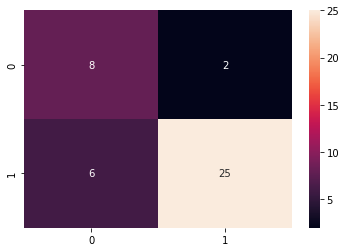

In [80]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot = True)

**Find out the accuracy**

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8048780487804879

**Find out the auc roc score**

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred)

0.803225806451613

In [83]:
fpr,tpr,threshold = metrics.roc_curve(Y_test,classifier.predict_proba(X_test)[:,1])

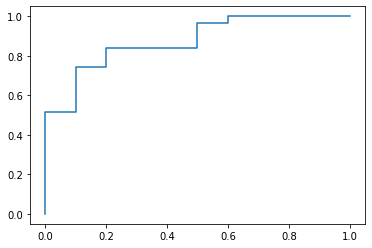

In [84]:
plt.plot(fpr,tpr)

**Find out number of 0 classes in Y_test**

In [85]:
sum(Y_test == 0)

10

**Find out number of 1 classes in Y_test**

In [86]:
sum(Y_test == 1)

31

**Find Recall and Precision**

In [87]:
recall = tp/(tp+fn)
recall

0.8064516129032258

In [88]:
precision = tp/(tp+fp)
precision

0.9259259259259259

In [89]:
f1_score = (2*precision*recall)/(precision+recall)
f1_score

0.8620689655172414

**Create the classification report and understand each term in it**

In [90]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.93      0.81      0.86        31

    accuracy                           0.80        41
   macro avg       0.75      0.80      0.76        41
weighted avg       0.84      0.80      0.81        41



In [91]:
  (0.57+0.93)/2

0.75

In [92]:
((0.57*10)+(0.93*31))/41 #weighted average

0.8421951219512196

In [93]:
Y_pred = (classifier.predict_proba(X_test)[:,1] >= 0.7 ).astype(int)

# Decision Tree

In [94]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [95]:
X= df.drop(['salary','status'],axis = 1).values
Y =df['status'].values

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42)

In [97]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()


In [98]:
dc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [99]:
Y_pred = dc.predict(X_test)

In [100]:
pd.DataFrame({'Actual': Y_test , 'Predicted' : Y_pred})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1
5,1,1
6,1,1
7,0,0
8,1,1
9,0,0


In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[ 8,  2],
       [ 5, 26]], dtype=int64)

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8292682926829268

In [103]:
Y_pred_train = dc.predict(X_train)

In [104]:
accuracy_score(Y_train, Y_pred_train)

1.0

In [105]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.93      0.84      0.88        31

    accuracy                           0.83        41
   macro avg       0.77      0.82      0.79        41
weighted avg       0.85      0.83      0.84        41



In [106]:
from sklearn import tree

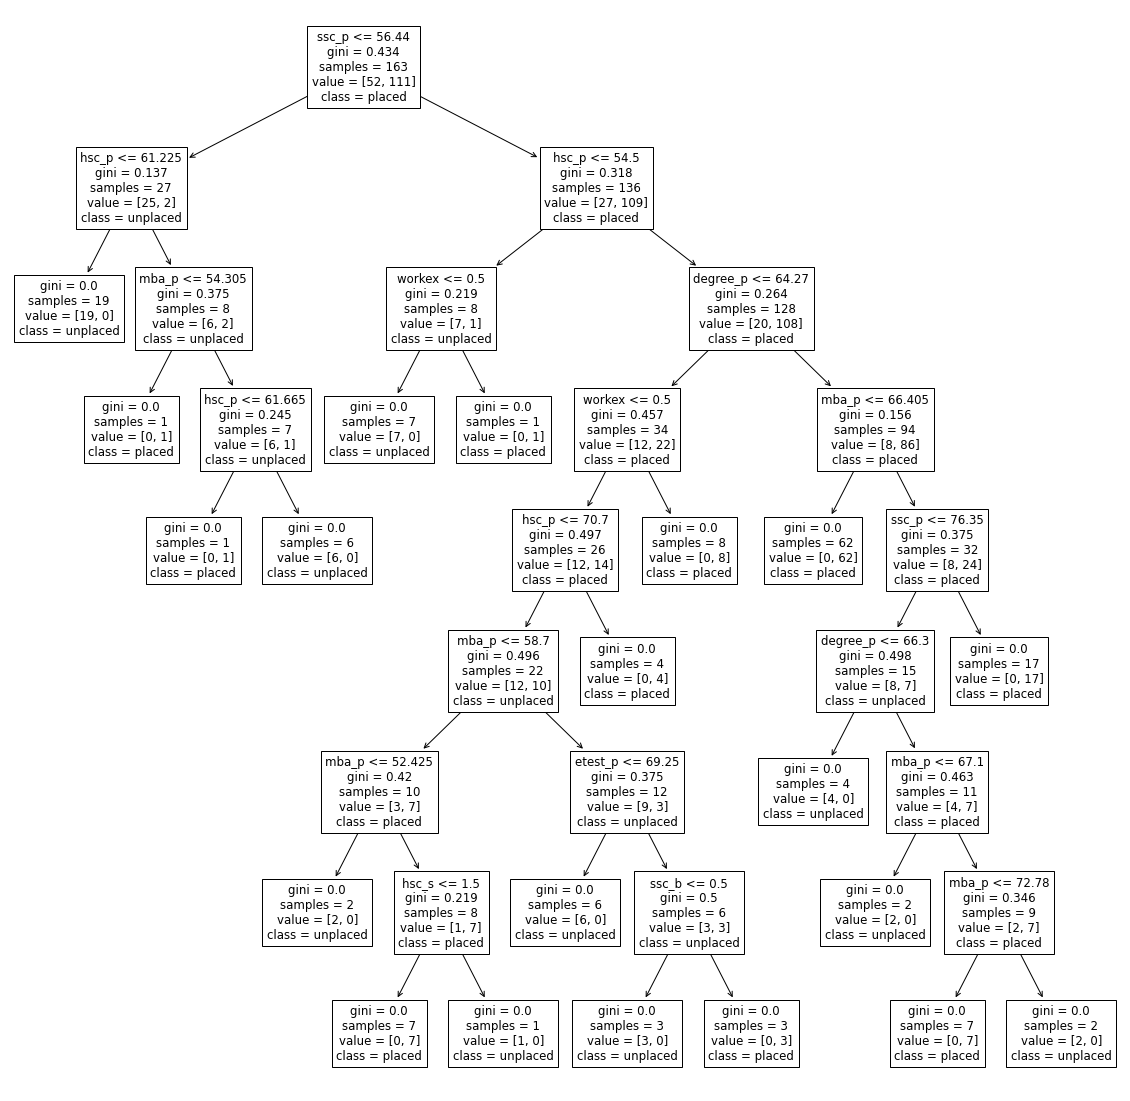

In [107]:
plt.figure(figsize= (20,20))
tree.plot_tree(dc, feature_names= df.columns[:-2], class_names= ['unplaced','placed'])
plt.show()

In [108]:
df.columns[:-2]

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

# Random Forest

In [109]:
n_estimators=[10,20,30,40,50,60,70,80,90,100,150]

In [110]:
max_features = ['sqrt','log2']

In [111]:
max_depth = np.linspace(10,120,10 ,dtype = int)

In [112]:
[int(x) for x in np.linspace(10, 120 , 10)]

[10, 22, 34, 46, 58, 71, 83, 95, 107, 120]

In [113]:
np.linspace(10,120,10 ,dtype = int)

array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120])

In [114]:
criterion = ["gini", 'entropy']

In [115]:
min_samples_split = [2,4,6,8,10,12,14,16,18,20]

In [116]:
random_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_depth' : max_depth,
              'criterion' : criterion,
              'min_samples_split': min_samples_split}

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf = RandomForestClassifier()

In [119]:
%%time
from sklearn.model_selection import RandomizedSearchCV

Wall time: 0 ns


In [120]:
%%time
rdsc = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, n_iter = 100,
                         n_jobs = 1)

Wall time: 0 ns


In [121]:
%%time
rdsc.fit(X_train,Y_train)

Wall time: 35.6 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         150]})

In [122]:
rdsc.best_params_

{'n_estimators': 150,
 'min_samples_split': 4,
 'max_features': 'log2',
 'max_depth': 83,
 'criterion': 'entropy'}

In [123]:
rfbm = RandomForestClassifier(n_estimators= 50, min_samples_split= 10, max_features='sqrt',max_depth= 83, criterion= 'entropy')

In [124]:
rfbm.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=83, max_features='sqrt',
                       min_samples_split=10, n_estimators=50)

In [125]:
Y_pred = rfbm.predict(X_test)

In [126]:
metrics.accuracy_score(Y_test,Y_pred)

0.8780487804878049

In [127]:
confusion_matrix(Y_test,Y_pred)

array([[ 7,  3],
       [ 2, 29]], dtype=int64)

In [128]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.91      0.94      0.92        31

    accuracy                           0.88        41
   macro avg       0.84      0.82      0.83        41
weighted avg       0.87      0.88      0.88        41



In [129]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0


# Clustering 

In [130]:
new_df = df

In [131]:
# Do feature (standard) scaling and then fit again

In [132]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(new_df)

KMeans(n_clusters=3)

In [133]:
kmeans.predict(new_df)

array([0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 1])

In [134]:
new_df['clusters'] = kmeans.predict(new_df)
new_df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,1
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,2
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0,1


In [135]:
kmeans.inertia_

252199482354.73566

In [136]:
new_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,1
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,2
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,2
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,0


In [137]:
new_df = new_df.reset_index(drop=True)

**Use Elbow method to find the optimal number of clusters**

In [138]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,1
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,2
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,2
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,0


In [139]:
df = df.drop('clusters',axis = 1)

In [140]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0


In [141]:
inertia_list = []
for i in range (1,50):
    kmeans = KMeans(i)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)
    print(inertia_list)

[4137280853565.9233]
[4137280853565.9233, 714353297315.3065]
[4137280853565.9233, 714353297315.3065, 252199482354.73566]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.7

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 171010897

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80897542168.41286, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327, 7400921725.312716, 5546035444.305332, 4295616944.291131, 3348900630.7570524, 2705371299.319525, 1980095947.0529876, 1691795385.2661018, 1436772779.755819, 1215965687.7912722, 998720360.7042662, 817271297.4278504, 621663723.570419, 444022829.508511, 339958261.1809407, 295886523.89631253, 245886375.77833027, 215646180.6307272, 176082376.4124426, 156121309.80041495, 125313625.37348843, 103884577.52511226, 81138119.05509496, 60052129.595187545, 45478786.827696465, 34812066.47487983, 26811990.61922983, 22636968.940494932, 16011284.332836503, 10677738.350711506, 7677513.953278169, 5009924.931794832, 3009741.012744832, 1580979.7168076893, 723624.5370124507, 56419.77271245098, 50035.42034548614, 46645.18334327249, 43503.38862592138, 41642.89290171927, 38701.03026451068, 35590.27744143239, 35186.360485042715, 33141.074382

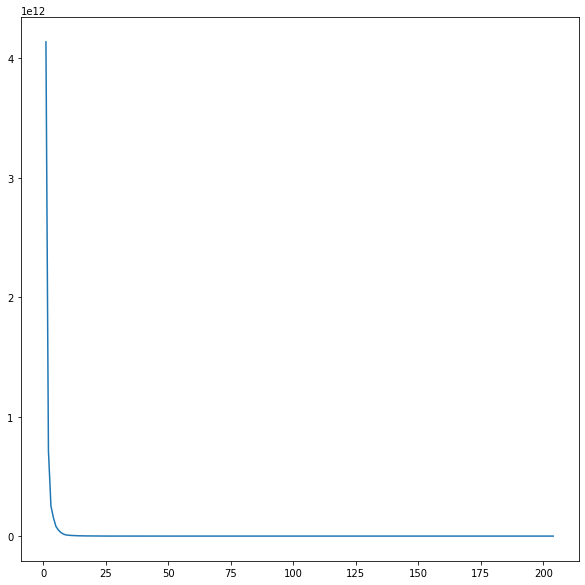

In [142]:
plt.figure(figsize= (10,10))
plt.plot(range(1,50), inertia_list)
plt.show()

In [143]:
inertia_list = []
for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)
    print(inertia_list)

[4137280853565.9233]
[4137280853565.9233, 714353297315.3065]
[4137280853565.9233, 714353297315.3065, 252199482354.73566]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80539689452.88948]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80539689452.88948, 50218571176.74993]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80539689452.88948, 50218571176.74993, 29327814751.47285]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80539689452.88948, 50218571176.74993, 29327814751.47285, 17101089701.640137]
[4137280853565.9233, 714353297315.3065, 252199482354.73566, 152980954087.66837, 80539689452.88948, 50218571176.74993, 29327814751.47285, 17101089701.640137, 9639335504.113327]


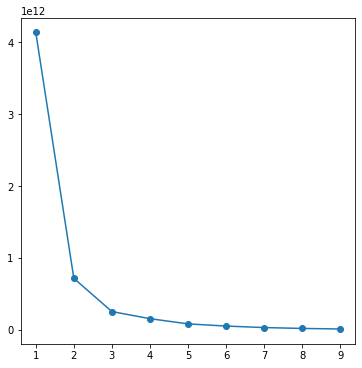

In [144]:
plt.figure(figsize= (6,6))
plt.plot(range(1,10), inertia_list,marker = 'o')
plt.show()

# PCA

In [145]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [146]:
df9 = df.reset_index().drop(['status','salary'],axis = 1)

In [147]:
df9

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
1,2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
2,3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
3,4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
4,5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
200,211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
201,212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
202,213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [148]:
df9 = df9.drop('index',axis = 1)

In [149]:
df9

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
1,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
2,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
3,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
4,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58
...,...,...,...,...,...,...,...,...,...,...,...,...
199,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
200,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
201,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
202,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [150]:
df9 = df9.drop(['gender','ssc_b','hsc_s','hsc_b','degree_t','workex','specialisation'],axis =1)

In [151]:
df9

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,79.33,78.33,77.48,86.5,66.28
1,65.00,68.00,64.00,75.0,57.80
2,56.00,52.00,52.00,66.0,59.43
3,85.80,73.60,73.30,96.8,55.50
4,55.00,49.80,67.25,55.0,51.58
...,...,...,...,...,...
199,80.60,82.00,77.60,91.0,74.49
200,58.00,60.00,72.00,74.0,53.62
201,67.00,67.00,73.00,59.0,69.72
202,74.00,66.00,58.00,70.0,60.23


In [152]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_transformed = sc.fit_transform(df9)


In [153]:
X_transformed

array([[ 1.1107654 ,  1.24218185,  1.57612522,  1.11830048,  0.70157924],
       [-0.2367282 ,  0.15913311, -0.32731048,  0.23621533, -0.77651256],
       [-1.08302565, -1.51838673, -2.02176363, -0.45411217, -0.49239822],
       ...,
       [-0.0486621 ,  0.05428812,  0.94352938, -0.99103356,  1.30118252],
       [ 0.60956924, -0.05055687, -1.17453705, -0.14729995, -0.3529556 ],
       [-0.51882735, -0.88931679, -1.8805592 ,  1.31005812, -0.35469863]])

In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 4) 

In [185]:
principal_components = pca.fit_transform(X_transformed)
principal_components

array([[ 2.57869485e+00,  2.61708655e-01, -3.13285592e-01,
         2.23641093e-01],
       [-4.49035446e-01,  3.53097811e-01, -6.66771373e-01,
        -2.42570504e-01],
       [-2.62024105e+00,  5.04241990e-01,  6.02581666e-01,
        -3.45322519e-01],
       [ 1.84638055e+00,  1.33633906e+00, -1.95558154e+00,
         5.69366185e-01],
       [-2.54357244e+00, -6.22250548e-01, -7.06996447e-01,
         1.44692308e+00],
       [-1.60150987e+00,  4.59200880e-01, -4.59464392e-01,
         2.44940587e+00],
       [ 4.24978033e-01, -4.27860267e-01, -2.49883466e-01,
         3.46807813e-01],
       [ 1.68807141e+00,  9.07934123e-01, -9.00322939e-01,
        -2.88006699e-01],
       [-1.80247037e+00, -9.62287693e-01, -1.31417398e+00,
        -6.33503065e-01],
       [-1.51330916e+00, -2.80420932e-01,  3.43574086e-01,
        -2.80698034e-01],
       [ 8.43226607e-01, -1.33594354e+00, -2.91613022e-02,
         9.64527629e-01],
       [-1.69834123e+00, -2.69896065e-01,  1.40189065e+00,
      

In [186]:
sum(pca.explained_variance_ratio_)

0.9074517307012999

In [157]:
pca_df = pd.DataFrame(principal_components, columns = ['PC1','PC2','PC3','PC4'])
pca_df

,PC1,PC2,PC3,PC4
0,2.578695,0.261709,-0.313286,0.223641
1,-0.449035,0.353098,-0.666771,-0.242571
2,-2.620241,0.504242,0.602582,-0.345323
3,1.846381,1.336339,-1.955582,0.569366
4,-2.543572,-0.622251,-0.706996,1.446923
...,...,...,...,...
199,3.525238,0.374948,0.784114,-0.241525
200,-0.952363,0.316870,-0.979123,1.130279
201,0.683357,-1.264848,1.107870,0.371930
202,-0.480379,0.111636,-0.318924,-0.608826


In [158]:
sub_df = df[['gender','ssc_b','hsc_s','hsc_b','degree_t','workex','specialisation','status','salary']]
sub_df

,gender,ssc_b,hsc_s,hsc_b,degree_t,workex,specialisation,status,salary
1,1,0,2,1,2,1,0,1,200000.0
2,1,0,0,0,0,0,0,1,250000.0
3,1,0,2,0,2,0,1,0,0.0
4,1,0,1,0,0,0,0,1,425000.0
5,1,1,2,1,2,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...
210,1,1,1,1,0,0,0,1,400000.0
211,1,1,2,1,2,0,0,1,275000.0
212,1,1,1,1,0,1,0,1,295000.0
213,0,1,1,1,0,0,1,1,204000.0


In [159]:
sub_df = sub_df.reset_index()
sub_df

,index,gender,ssc_b,hsc_s,hsc_b,degree_t,workex,specialisation,status,salary
0,1,1,0,2,1,2,1,0,1,200000.0
1,2,1,0,0,0,0,0,0,1,250000.0
2,3,1,0,2,0,2,0,1,0,0.0
3,4,1,0,1,0,0,0,0,1,425000.0
4,5,1,1,2,1,2,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
199,210,1,1,1,1,0,0,0,1,400000.0
200,211,1,1,2,1,2,0,0,1,275000.0
201,212,1,1,1,1,0,1,0,1,295000.0
202,213,0,1,1,1,0,0,1,1,204000.0


In [160]:
sub_df = sub_df.drop('index',axis =1)

In [161]:
sub_df 

,gender,ssc_b,hsc_s,hsc_b,degree_t,workex,specialisation,status,salary
0,1,0,2,1,2,1,0,1,200000.0
1,1,0,0,0,0,0,0,1,250000.0
2,1,0,2,0,2,0,1,0,0.0
3,1,0,1,0,0,0,0,1,425000.0
4,1,1,2,1,2,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...
199,1,1,1,1,0,0,0,1,400000.0
200,1,1,2,1,2,0,0,1,275000.0
201,1,1,1,1,0,1,0,1,295000.0
202,0,1,1,1,0,0,1,1,204000.0


In [162]:
final_df = pd.concat([pca_df,sub_df],axis = 1)
final_df

,PC1,PC2,PC3,PC4,gender,ssc_b,hsc_s,hsc_b,degree_t,workex,specialisation,status,salary
0,2.578695,0.261709,-0.313286,0.223641,1,0,2,1,2,1,0,1,200000.0
1,-0.449035,0.353098,-0.666771,-0.242571,1,0,0,0,0,0,0,1,250000.0
2,-2.620241,0.504242,0.602582,-0.345323,1,0,2,0,2,0,1,0,0.0
3,1.846381,1.336339,-1.955582,0.569366,1,0,1,0,0,0,0,1,425000.0
4,-2.543572,-0.622251,-0.706996,1.446923,1,1,2,1,2,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,3.525238,0.374948,0.784114,-0.241525,1,1,1,1,0,0,0,1,400000.0
200,-0.952363,0.316870,-0.979123,1.130279,1,1,2,1,2,0,0,1,275000.0
201,0.683357,-1.264848,1.107870,0.371930,1,1,1,1,0,1,0,1,295000.0
202,-0.480379,0.111636,-0.318924,-0.608826,0,1,1,1,0,0,1,1,204000.0


In [176]:
X = final_df.iloc[:,:-2]
Y = final_df.iloc[:,-1]

In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.70, random_state = 100)

In [196]:
reg=LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [197]:
Y_pred=reg.predict(X_test)

In [198]:
metrics.r2_score(Y_test,Y_pred)



0.53465101505039